In [59]:
import matplotlib.pyplot as plt
import numpy as np

#All from perspective of server IE upload is actually server send(client Recieve), download is server receive(client send)

upload_data = {
    'verizon-lte-1' : [],
    'verizon-lte-2' : [],
    'verizon-lte-3' : [],
    'tmobile-lte-1' : [],
    'tmobile-lte-2' : [],
    'tmobile-lte-3' : [],
    'ethernet-1' : [],
    'ethernet-2' : [],
    'ethernet-3' : [],
    '5g-sunny-1' : [],
    '5g-sunny-2' : [],
    '5g-sunny-3' : [],
}

download_data = {
    'verizon-lte-1' : [],
    'verizon-lte-2' : [],
    'verizon-lte-3' : [],
    'tmobile-lte-1' : [],
    'tmobile-lte-2' : [],
    'tmobile-lte-3' : [],
    'ethernet-1' : [],
    'ethernet-2' : [],
    'ethernet-3' : [],
    '5g-sunny-1' : [],
    '5g-sunny-2' : [],
    '5g-sunny-3' : [],
}

latency_data = {
    'verizon-lte-1' : [],
    'verizon-lte-2' : [],
    'verizon-lte-3' : [],
    'tmobile-lte-1' : [],
    'tmobile-lte-2' : [],
    'tmobile-lte-3' : [],
    'ethernet-1' : [],
    'ethernet-2' : [],
    'ethernet-3' : [],
    '5g-sunny-1' : [],
    '5g-sunny-2' : [],
    '5g-sunny-3' : [],
}

for dataset in upload_data:
    with open('./{}/upload.txt'.format(dataset), 'r') as f:
        for line in f:
            upload_data[dataset].append(float(line))
    f.close()

for dataset in download_data:
    with open('./{}/download.txt'.format(dataset), 'r') as f:
        for line in f:
            download_data[dataset].append(float(line))    
        f.close()

for dataset in latency_data:
    with open('./{}/latency.txt'.format(dataset), 'r') as f:
        for line in f:
            latency_data[dataset].append(float(line))
    f.close()
    

start = 10
end = 100
templates = ['verizon-lte', 'tmobile-lte', 'ethernet', '5g-sunny']
def combine(data):
    for carrier in templates:
        data[carrier] = []
        for i in range(3):
            data[carrier] += data[carrier + '-' + str(i+1)][start:end]
    
combine(upload_data)    
combine(download_data)
combine(latency_data)


In [60]:
def plotInHist(data, xlab, ylab, title, bins):
    kwargs = dict(histtype='step', stacked=True,
              alpha=0.6)
    fig = plt.figure()
    plt.hist(data['verizon-lte'], **kwargs, color='blue', label='Verizon', bins=bins)
    plt.hist(data['tmobile-lte'], **kwargs, color='red', label='T-Mobile', bins=bins)
    plt.hist(data['ethernet'], **kwargs, color='orange', label='Ethernet', bins=bins)
    plt.hist(data['5g-sunny'], **kwargs, color='magenta', label='AT&T (5G)', bins=bins);
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()
    return fig

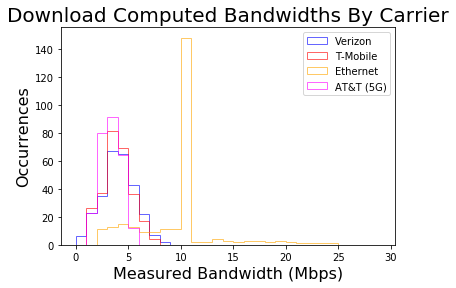

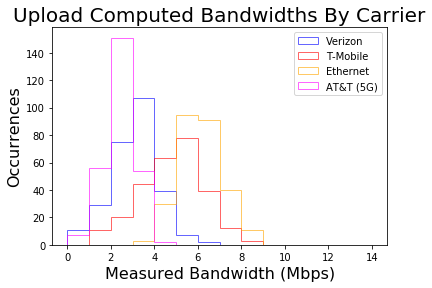

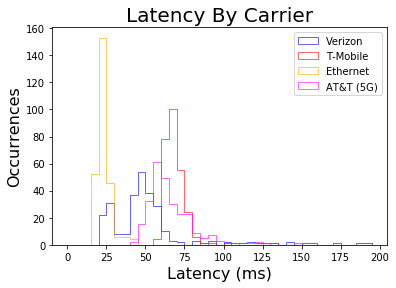

In [61]:
bins1 = list(range(0, 30, 1)) #for download 
bins2 = list(range(0, 15, 1)) #for upload
bins3 = list(range(0, 200, 5)) #for latency


fig = plotInHist(upload_data, 'Measured Bandwidth (Mbps)', 'Occurrences', 'Download Computed Bandwidths By Carrier', bins1)
fig.savefig('download.png', transparent=True)

fig = plotInHist(download_data, 'Measured Bandwidth (Mbps)', 'Occurrences', 'Upload Computed Bandwidths By Carrier', bins2)
fig.savefig('upload.png', transparent=True)

fig = plotInHist(latency_data, 'Latency (ms)', 'Occurrences', 'Latency By Carrier', bins3)
fig.savefig('upload.png', transparent=True)


In [33]:
#Grace Period Graphing for tmobile lte

points = 23

grace_1_upload = np.zeros((points, 3))
grace_1_download = np.zeros((points, 3))
grace_1_latency = np.zeros((points, 3))
grace_10_upload = np.zeros((points, 3))
grace_10_download = np.zeros((points, 3))
grace_10_latency = np.zeros((points, 3))
grace_50_upload = np.zeros((points, 3))
grace_50_download = np.zeros((points, 3))
grace_50_latency = np.zeros((points, 3))

with open('./tmobile-lte/grace-period-1/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][2] = float(line)
        count += 1
f.close()

In [34]:
avg_grace_1_upload = np.mean(grace_1_upload, axis=1)
avg_grace_10_upload = np.mean(grace_10_upload, axis=1)
avg_grace_50_upload = np.mean(grace_50_upload, axis=1)

avg_grace_1_download = np.mean(grace_1_download, axis=1)
avg_grace_10_download = np.mean(grace_10_download, axis=1)
avg_grace_50_download = np.mean(grace_50_download, axis=1)

avg_grace_1_latency = np.mean(grace_1_latency, axis=1)
avg_grace_10_latency = np.mean(grace_10_latency, axis=1)
avg_grace_50_latency = np.mean(grace_50_latency, axis=1)

In [35]:
def plotLines(g1, g10, g50, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1,color='blue', label='\u03BB = 1')
    plt.plot(range(g10.shape[0]), g10, color='red', label='\u03BB = 10')
    plt.plot(range(g50.shape[0]), g50, color='orange', label='\u03BB = 50');
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

In [40]:
def plotLinesExtra(g1, g1_o, g10, g10_o, g50, g50_o, xlab, ylab, title):
    fig = plt.figure()
    plt.plot(range(g1.shape[0]), g1, color='blue', label='\u03BB = 1')
    plt.plot(range(g1_o.shape[0]), g1_o[:, 0], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 1], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 2], color='blue', alpha=0.2)
    plt.plot(range(g10.shape[0]), g10, color='red', label='\u03BB = 10')
    plt.plot(range(g10_o.shape[0]), g10_o[:, 0], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 1], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 2], color='red', alpha=0.2)
    plt.plot(range(g50.shape[0]), g50, color='orange', label='\u03BB = 50')
    plt.plot(range(g50_o.shape[0]), g50_o[:, 0], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 1], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 2], color='orange', alpha=0.2)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()
    return fig

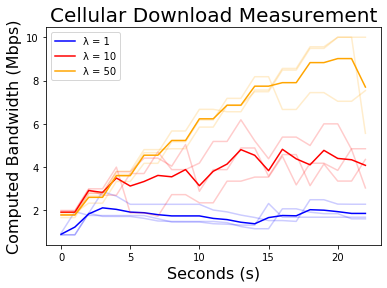

In [41]:
fig = plotLinesExtra(avg_grace_1_upload, grace_1_upload, avg_grace_10_upload, grace_10_upload, avg_grace_50_upload, grace_50_upload, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Download Measurement')

fig.savefig('grace_download.png', transparent=True)


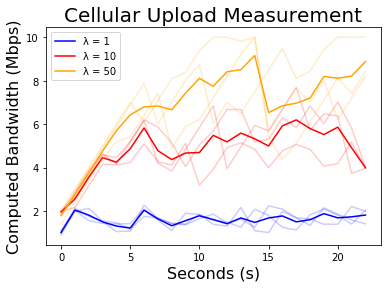

In [42]:
fig = plotLinesExtra(avg_grace_1_download, grace_1_download, avg_grace_10_download, grace_10_download, avg_grace_50_download, grace_50_download, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Upload Measurement')

fig.savefig('grace_upload.png', transparent=True)

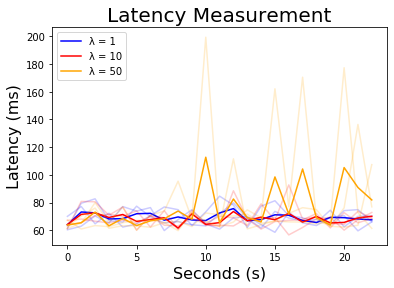

In [43]:
fig = plotLinesExtra(avg_grace_1_latency, grace_1_latency, avg_grace_10_latency, grace_10_latency, avg_grace_50_latency, grace_50_latency, 'Seconds (s)', 'Latency (ms)', 'Latency Measurement')

fig.savefig('grace_latecy.png', transparent=True)